Kristen Swerzenski

DSC 680 Applied Data Science

2 February 2025

## Project 2: Impacts of Urbanization on Climate

### Introduction

Since the 1950s, the global urban population has surged from 751 million to over 4.2 billion, with projections adding another 2.1 billion by 2050 (United Nations, 2018). This rapid urbanization drives economic growth but also increases energy demand, infrastructure expansion, and transportation needs—key contributors to rising CO₂ emissions. Urban areas account for nearly 70% of global CO₂ emissions from energy consumption, reaching up to 80% in North America (Luqman et al., 2023). However, cities also offer opportunities for sustainability through efficient land use, public transit, and renewable energy (Ritcher et al., 2024).

This study examines how urbanization influences national CO₂ emissions, focusing on key drivers such as population density, energy consumption, and infrastructure. In doing so, the goal is to inform policies that support sustainable urban growth particularly in developing regions that are set to face the biggest increases in urbanization in the coming years. Data was obtained from the World Bank and coallated into a dataset by user Bushra Qurban on Kaggle that details various urbanization and environmental metrics for different countries by year. The data will be uploaded and cleaned, followed by an exploratory data analysis to identify key relationships to be explored with modeling. Two types of models will be deployed: a linear regression model to analyze the relationships between urbanization variables and carbon emisssions, and a K-means clustering model to group countries by urbanization, environmental, and infrastructure profiles in an effort to develop more targeted strategies for countries in different stages of development.

### Loading in the Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# SEtting data frame viewing options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Checking the data frame
df = pd.read_csv("global_urbanization_climate_metrics.csv")
df.head()

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
0,Aruba,ABW,1960,54922.0,NaN,NaN,50.776000,49.224000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,130072080.0,NaN,2.421063e+10,14.576676,85.423324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1960,9035043.0,NaN,NaN,8.401000,91.599000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1960,97630925.0,NaN,1.190495e+10,14.710006,85.289994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,1960,5231654.0,NaN,NaN,10.435000,89.565000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Preparation

After initial glance at the dataset, a decent amount of cleaning and formatting will need to be completed in order to prepare the data for the targeted models. Firs, I am going to check for consistencies in the country names to ensure there isn't any typos or other errors that might throw a wrench in analysis. I wil then work to understand what values are missing and the best courrse of action to deal with them.

#### Filtering Dataset to Only Include Individual Countries

The first thing I want to do is take a look at all of the countries that are included in the dataset. Looking at the readout below, it is evident that the dataset doesn't just contian individual countries but regions and groupings as well (such as "East Asia & Pacific (excluding high income)" and "Low income"). While these groups might be useful for other analyses, since it is difficult to determine what exact countries are included individually and what ones my be lumped into these groups, it is impossible to tell if including these groups would be double counting certain countries. To fix this, I am going to create a function using the country codes to filter out any codes that don't match a recognized country in the iso3166 country code list. 

In [5]:
# Listing all unique values of countries
df['country'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [6]:
# Comparing country codes against iso3166 codes
import iso3166

def is_valid_country_code(code):
    try:
        iso3166.countries.get(code)
        return True
    except KeyError:
        return False

# Filtering out invalid country codes (non-countries)
df_filtered = df[df['country_code'].apply(is_valid_country_code)]

df_filtered['country'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Faroe Islands', 'Micronesia, Fed. Sts.', 'Gabon',
 

Now we are just left with individual countries, making this analysis easier.

### Handling Missing Values

The next step will be to handle missing values. This is a bit of a daunting task as missing values vary considerably based on countries, years, and even within individual variables. The first step to dealing with these missing values is to understand the patterns of missing values. To start, I am going to run somme summaries of missing values to better understand their distributions by country, year, and variable. 

In [7]:
# Checking rates of missing values for each variable
missing_values = df_filtered.isnull().mean().sort_values(ascending=False) * 100
missing_values

safe_sanitation_pop         77.452257
clean_fuel_tech_cook_pop    68.554688
basic_sanitation_pop        65.371817
energy_kg_oil_eq_cap        56.069155
elect_access_pop            54.542824
internet_use_pop            51.453993
ren_energy_cons_perc        51.200810
co2_emiss_excl_lulucf       22.171586
gdp                         18.033854
pop_dens_sq_km              12.912326
urban_pop_perc               0.925926
rural_pop_perc               0.925926
total_pop                    0.217014
country                      0.000000
country_code                 0.000000
year                         0.000000
dtype: float64

Looking at missing valuie percentages by variable, we can see that by far access to safe sanitation, usage of clean cooking technologies, and acess to basic sanitation are all missing the greater majority of values (between 65-77%). However, a challenge that will persist throughout this process is determining whether a value is missing because it is not reported for the country or if it is missing because it does not exist for the country. For example, a country that doesn't have any acess to clean cooking technology might not report on it at all, making the true values 0s but they show as nulls. Because there is no documentation on reporting, and because reporting likely varies drastically from country to country, we'll have to think creatively on how to handle this.

In [8]:
# Filtering and retrieving missing values by country
missing_by_country = df_filtered.groupby('country').apply(lambda x: x.isnull().mean() * 100)

# Sorting by the percentage of missing values for better interpretation
missing_by_country_sorted = missing_by_country.mean(axis=1).sort_values(ascending=False)

missing_by_country_sorted

country
Kosovo                            70.800781
St. Martin (French part)          67.968750
Sint Maarten (Dutch part)         53.808594
South Sudan                       53.417969
Curacao                           46.386719
West Bank and Gaza                46.191406
Montenegro                        44.921875
Northern Mariana Islands          43.066406
Isle of Man                       42.968750
British Virgin Islands            41.894531
San Marino                        41.406250
American Samoa                    40.917969
Turks and Caicos Islands          40.625000
Serbia                            40.527344
Cayman Islands                    39.062500
Monaco                            38.476562
Eritrea                           37.792969
Guam                              37.792969
Virgin Islands (U.S.)             37.792969
Liechtenstein                     37.597656
Palau                             37.207031
Afghanistan                       36.425781
Aruba                   

Looking at the countries that have the highest rates of missing values is also critical because we want to ensure that countries of all sizes and in all stages of development are represented in this analysis. However, based on the above breakdown it appears that the countries with the highest rates of missing values are smaller, less developed countries. Again, it is hard to tell if missing values are because certain variables don't apply or if there is just n reporting done that captures these values, but we'll want to make sure we can figure out a method of handling missing values that doesn't just drop them outright from the dataset as we will be excluding an entire demographic of nations.

In [9]:
# Filtering and retrieving missing values by year
missing_by_year = df.groupby('year').apply(lambda x: x.isnull().mean() * 100)

# Sortting by the percentage of missing values for better interpretation
missing_by_year_sorted = missing_by_year.mean(axis=1).sort_values(ascending=False)

missing_by_year_sorted

year
1960    58.247180
2023    54.863722
1961    53.007519
1963    52.937030
1962    52.937030
1964    52.937030
1966    52.749060
1967    52.678571
1968    52.655075
1969    52.655075
1965    52.608083
1970    46.099624
1971    43.444549
1972    43.444549
1973    43.444549
1974    43.444549
1975    43.186090
1976    43.186090
1978    43.139098
1979    43.115602
1977    43.115602
1980    42.880639
1981    42.857143
1982    42.833647
1983    42.833647
1984    42.786654
1985    42.716165
1986    42.716165
1987    42.551692
1988    42.481203
1989    42.457707
1991    26.879699
1990    26.574248
1992    25.869361
1996    25.540414
1993    25.399436
1994    25.234962
1997    25.023496
1995    24.953008
1998    24.647556
1999    24.295113
2022    16.235902
2021    12.288534
2018    11.231203
2019    11.066729
2020    11.043233
2017    10.361842
2016    10.338346
2015     9.468985
2000     7.119361
2001     6.884398
2003     6.743421
2002     6.602444
2008     6.320489
2010     6.250000
2009 

Looking at the distribution of missing values by year, it is clear that there is a pattern of earlier years missing more informaion. This could be that some of these variables (like internet usage) might not have existed in earlier years, or that reporting structures were not as robust enough to capture all of this data. A lot of nuances to take into account with the patterns of these missing values.

In [10]:
# Calculating the percentage of missing values for each variable by country
missing_percentages = df_filtered.groupby('country').apply(lambda group: group.isnull().mean() * 100)

# Displaying the results
display(missing_percentages)

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
country,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.000,3.1250,62.5000,0.0,0.0,64.0625,59.3750,64.0625,100.0000,100.0000,48.4375,64.0625,17.1875
Albania,0.0,0.0,0.0,0.000,3.1250,31.2500,0.0,0.0,48.4375,46.8750,64.0625,64.0625,31.2500,50.0000,64.0625,17.1875
Algeria,0.0,0.0,0.0,0.000,3.1250,0.0000,0.0,0.0,64.0625,48.4375,64.0625,64.0625,31.2500,50.0000,64.0625,17.1875
American Samoa,0.0,0.0,0.0,0.000,3.1250,67.1875,0.0,0.0,100.0000,90.6250,64.0625,64.0625,100.0000,48.4375,100.0000,17.1875
Andorra,0.0,0.0,0.0,0.000,3.1250,15.6250,0.0,0.0,48.4375,51.5625,64.0625,64.0625,100.0000,48.4375,64.0625,100.0000
Angola,0.0,0.0,0.0,0.000,3.1250,31.2500,0.0,0.0,64.0625,48.4375,64.0625,100.0000,31.2500,50.0000,64.0625,17.1875
Antigua and Barbuda,0.0,0.0,0.0,0.000,3.1250,26.5625,0.0,0.0,48.4375,48.4375,78.1250,100.0000,92.1875,48.4375,64.0625,17.1875
Argentina,0.0,0.0,0.0,0.000,3.1250,3.1250,0.0,0.0,48.4375,46.8750,73.4375,73.4375,31.2500,50.0000,64.0625,17.1875
Armenia,0.0,0.0,0.0,0.000,51.5625,46.8750,0.0,0.0,64.0625,48.4375,64.0625,64.0625,60.9375,50.0000,64.0625,17.1875


I ended this prying into the missing value distributions by looking at a matrix of missiving value percentages by country by varirable. For the most part, population and economy metrics are farily robust, and given these variables typiclaly experience fairly linear temporal trends a temporal interpolation can be utilized to interpolate missing values. For other variables, we'll have to use a more creative approach.

#### Temporal Interpolation

As mentioned above, temporal interpolation was chosen to handle missing values for variables that exhibited clear temporal trends. This method leverages the natural progression of data over time, filling in gaps by estimating values based on observed trends in preceding and following years. By maintaining consistency within each country's data while preserving overall patterns, temporal interpolation ensures that missing values are addressed without introducing biases or distorting relationships between variables. However, this interpolation will be performed with a caveat - for any countries that have no values at all reported for a certain variable, those nulls will be kept. Because of some of the challenges mentioned above about not knowing if certain missing values are due to a lack of reporting or the values truly being 0, we will preserve these missing values because there is nothing to really base them on for imputation.

In [11]:
# Sorting data by country and year
df_imputed = df_filtered.sort_values(['country', 'year'])
df_imputed.head()

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
2,Afghanistan,AFG,1960,9035043.0,NaN,NaN,8.401,91.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,Afghanistan,AFG,1961,9214083.0,14.127046,NaN,8.684,91.316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,Afghanistan,AFG,1962,9404406.0,14.418849,NaN,8.976,91.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,Afghanistan,AFG,1963,9604487.0,14.725614,NaN,9.276,90.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,Afghanistan,AFG,1964,9814318.0,15.047327,NaN,9.586,90.414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Defining the variables for temporal interpolation
temporal_vars = ['total_pop', 'gdp', 'pop_dens_sq_km']

In [13]:
# Building a function to perform a temporal interpolation
def temporal_interpolation(group):
    for var in temporal_vars:
        # Preserving rows where the entire variable is NaN for a country
        if group[var].isnull().all():
            continue
        group[var] = group[var].interpolate(method='linear', limit_direction='both')
        group = group.reset_index(drop=True)
    return group

In [14]:
# Applying the temporal interpolation
df_imputed = df_imputed.groupby('country').apply(temporal_interpolation)
df_imputed = df_imputed.reset_index(drop=True)
df_imputed.head()

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
0,Afghanistan,AFG,1960,9035043.0,14.127046,3.521418e+09,8.401,91.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,9214083.0,14.127046,3.521418e+09,8.684,91.316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,9404406.0,14.418849,3.521418e+09,8.976,91.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,9604487.0,14.725614,3.521418e+09,9.276,90.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,9814318.0,15.047327,3.521418e+09,9.586,90.414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Resetting the index
df_imputed = df_imputed.reset_index(drop=True)

In [16]:
# Checking missing values after interpolation
missing_values = df_imputed.isnull().mean().sort_values(ascending=False) * 100
missing_values

safe_sanitation_pop         77.452257
clean_fuel_tech_cook_pop    68.554688
basic_sanitation_pop        65.371817
energy_kg_oil_eq_cap        56.069155
elect_access_pop            54.542824
internet_use_pop            51.453993
ren_energy_cons_perc        51.200810
co2_emiss_excl_lulucf       22.171586
gdp                          1.388889
urban_pop_perc               0.925926
rural_pop_perc               0.925926
pop_dens_sq_km               0.462963
country                      0.000000
country_code                 0.000000
year                         0.000000
total_pop                    0.000000
dtype: float64

After temporal interpolation, we see a significant reduction in missing values across the variables that were targeted. 

#### Cosine Similarity Imputation

To deal with some of the other variables with significant missing values, we are  going to attempt an imputation method known as cosine similarity imputation. Cosine similarity imputation is used to handle missing values for variables without clear temporal patterns but with structural similarities across countries. This method identifies countries with similar data distributions and imputes missing values based on their closest matches in multidimensional space. By leveraging relationships between countries with comparable economic, demographic, or energy profiles, cosine similarity preserves underlying patterns while reducing the risk of introducing artificial trends. We are also going to use the same caveat as with temporal interpolation that any countries with complete missing values for a certain variable will retain those missing variables.

In [17]:
# Defining the variables to be targeted for cosine similarity
similarity_vars = ['urban_pop_perc', 'rural_pop_perc', 'elect_access_pop', 'internet_use_pop', 'basic_sanitation_pop',
                   'safe_sanitation_pop', 'energy_kg_oil_eq_cap', 'ren_energy_cons_perc', 'clean_fuel_tech_cook_pop',
                   'co2_emiss_excl_lulucf']

In [18]:
# Building a function for cosine imputation
def cosine_imputation(df, vars_to_impute):
    for var in vars_to_impute:
        # Creating a matrix where rows are countries and columns are years
        data_matrix = df.pivot(index='country', columns='year', values=var)
        
        # Identifying countries with all NaN values and skip them
        fully_nan_countries = data_matrix.index[data_matrix.isnull().all(axis=1)]
        partially_nan_countries = data_matrix.index[data_matrix.isnull().any(axis=1) & data_matrix.notnull().any(axis=1)]
        
        # Computing cosine similarity between countries only for partially_nan_countries
        similarity_matrix = cosine_similarity(data_matrix.fillna(0))
        
        # Imputing missing values based on similar countries
        for i, country in enumerate(data_matrix.index):
            if country in partially_nan_countries:  # Only impute for partially_nan_countries
                missing_years = data_matrix.loc[country][data_matrix.loc[country].isnull()].index
                for year in missing_years:
                    # Getting similarity weights
                    sim_weights = similarity_matrix[i]
                    
                    # Applying weights only to countries with data for the specific year
                    weighted_values = data_matrix.loc[:, year] * sim_weights
                    total_weights = sim_weights[data_matrix.loc[:, year].notnull()].sum()
                    
                    # Calculating weighted average if possible
                    if total_weights > 0:
                        data_matrix.at[country, year] = weighted_values.sum() / total_weights
        
        # Flattening back to original format
        imputed_values = data_matrix.stack().reset_index()
        imputed_values.columns = ['country', 'year', var]
        
        # Keeping fully NaN countries as NaN
        imputed_values = imputed_values.set_index(['country', 'year'])
        for country in fully_nan_countries:
            imputed_values.loc[country, var] = None
        
        # Merging back into the original dataframe
        df = df.drop(columns=[var]).merge(imputed_values.reset_index(), on=['country', 'year'], how='left')
    
    return df

In [19]:
# Applying the impuutation and showing the data frame
df_imputed = cosine_imputation(df_imputed, similarity_vars)
df_imputed = df_imputed.reset_index(drop=True)
df_imputed.head()

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
0,Afghanistan,AFG,1960,9035043.0,14.127046,3.521418e+09,8.401,91.599,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,9214083.0,14.127046,3.521418e+09,8.684,91.316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,9404406.0,14.418849,3.521418e+09,8.976,91.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,9604487.0,14.725614,3.521418e+09,9.276,90.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,9814318.0,15.047327,3.521418e+09,9.586,90.414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Checking missing value distribution
missing_values = df_imputed.isnull().mean().sort_values(ascending=False) * 100
missing_values

safe_sanitation_pop         77.141204
clean_fuel_tech_cook_pop    68.554688
basic_sanitation_pop        64.228877
ren_energy_cons_perc        49.565972
elect_access_pop            48.676215
energy_kg_oil_eq_cap        29.918981
co2_emiss_excl_lulucf       22.171586
internet_use_pop            21.086516
gdp                          1.388889
urban_pop_perc               0.925926
rural_pop_perc               0.925926
pop_dens_sq_km               0.462963
country                      0.000000
country_code                 0.000000
year                         0.000000
total_pop                    0.000000
dtype: float64

While this method shows some reductions in missing values for some variables, there are still significant proportions of missing values in a lot of the variables most likely due to there not being enough information to base the imputations on. Because of this, I decided to analyze the temporal trends of these variables to see if temporal interpolation could be a used to supplement anything that cosine similarity imputation could not calculate. This visualization can be seen in the exploratory data analysis section, and the grid of time series plots showed that some linear temporal trend can be argued for most all of these variables, suggesting that temporal interpolation could be a viable method for filling in the remaining missing values. When weighing the balance of either having to use imputed values or completely drop a very specific demographic of countries due to the patterns of missing values, I'd rather transparently impute the variables to the best of my ability. Below I will run the interpolation again on the current data set with the variables that show some temporal trends. 

#### Temporal Imputation Take 2

In [22]:
# Defining new temporal variables
temp_vars = ['urban_pop_perc', 'rural_pop_perc', 'elect_access_pop', 'internet_use_pop', 'basic_sanitation_pop',
                   'safe_sanitation_pop', 'energy_kg_oil_eq_cap', 'ren_energy_cons_perc', 'clean_fuel_tech_cook_pop',
                   'co2_emiss_excl_lulucf']

In [23]:
def temporal_interpolation_two(group):
    for var in temp_vars:
        # Preserving rows where the entire variable is NaN for a country
        if group[var].isnull().all():
            continue
        group[var] = group[var].interpolate(method='linear', limit_direction='both')
        group = group.reset_index(drop=True)
    return group

In [24]:
# Performing the interpolation
df_imputed = df_imputed.groupby('country').apply(temporal_interpolation_two)
df_imputed = df_imputed.reset_index(drop=True)
df_imputed.head()

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
0,Afghanistan,AFG,1960,9035043.0,14.127046,3.521418e+09,8.401,91.599,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341
1,Afghanistan,AFG,1961,9214083.0,14.127046,3.521418e+09,8.684,91.316,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341
2,Afghanistan,AFG,1962,9404406.0,14.418849,3.521418e+09,8.976,91.024,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341
3,Afghanistan,AFG,1963,9604487.0,14.725614,3.521418e+09,9.276,90.724,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341
4,Afghanistan,AFG,1964,9814318.0,15.047327,3.521418e+09,9.586,90.414,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341


In [25]:
# Displaying the missing value percentages
missing_values = df_imputed.isnull().mean().sort_values(ascending=False) * 100
missing_values

safe_sanitation_pop         36.111111
energy_kg_oil_eq_cap        19.907407
clean_fuel_tech_cook_pop    12.500000
co2_emiss_excl_lulucf        6.018519
ren_energy_cons_perc         1.851852
gdp                          1.388889
internet_use_pop             1.388889
urban_pop_perc               0.925926
rural_pop_perc               0.925926
pop_dens_sq_km               0.462963
elect_access_pop             0.462963
basic_sanitation_pop         0.462963
country                      0.000000
country_code                 0.000000
year                         0.000000
total_pop                    0.000000
dtype: float64

While some missing values still exist, interpolation was able to fill in quite a few of these values and significantly reduce the number of missing values. From here, any remaining missing values most likely don't have enough trends or information available to base the imputation on, so we will have to drop those values before modeling.

#### Feature Engineering

The last bit of preparation I will complete is performing some feature engineering, specifically creating two new variables of per capita carbone emissions and per capita GDP. These variables will normalize both carbon emissions and GDP based on population size.

In [26]:
# Calculating GDP per capita
df_imputed['GDP_per_capita'] = df_imputed['gdp'] / df_imputed['total_pop']

In [27]:
# Checking addition
df_imputed.head()

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf,GDP_per_capita
0,Afghanistan,AFG,1960,9035043.0,14.127046,3.521418e+09,8.401,91.599,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,389.751112
1,Afghanistan,AFG,1961,9214083.0,14.127046,3.521418e+09,8.684,91.316,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,382.177810
2,Afghanistan,AFG,1962,9404406.0,14.418849,3.521418e+09,8.976,91.024,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,374.443432
3,Afghanistan,AFG,1963,9604487.0,14.725614,3.521418e+09,9.276,90.724,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,366.643014
4,Afghanistan,AFG,1964,9814318.0,15.047327,3.521418e+09,9.586,90.414,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,358.804153


In [28]:
# Calculating the CO2 per capita
df_imputed['co2_per_capita'] = df_imputed['co2_emiss_excl_lulucf'] / df_imputed['total_pop']

In [29]:
# Checking addition
df_imputed.head()

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf,GDP_per_capita,co2_per_capita
0,Afghanistan,AFG,1960,9035043.0,14.127046,3.521418e+09,8.401,91.599,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,389.751112,1.919305e-07
1,Afghanistan,AFG,1961,9214083.0,14.127046,3.521418e+09,8.684,91.316,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,382.177810,1.882010e-07
2,Afghanistan,AFG,1962,9404406.0,14.418849,3.521418e+09,8.976,91.024,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,374.443432,1.843923e-07
3,Afghanistan,AFG,1963,9604487.0,14.725614,3.521418e+09,9.276,90.724,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,366.643014,1.805510e-07
4,Afghanistan,AFG,1964,9814318.0,15.047327,3.521418e+09,9.586,90.414,95.734933,0.0,20.970919,NaN,NaN,23.0,5.5,1.7341,358.804153,1.766908e-07


Now that the dataset is prepared, we can move into some exploratory analysis.

### Exploratory Data Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Correlation Matrix

The first thing I want to look at are the overall relationships between the variables in the dataset, so I will construct a correlation matrix to do so.

In [31]:
# Defining numeric and non-numeric columns for easier visualization with imputed dataframe
numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns
non_numeric_cols = df_imputed.select_dtypes(exclude=[np.number]).columns

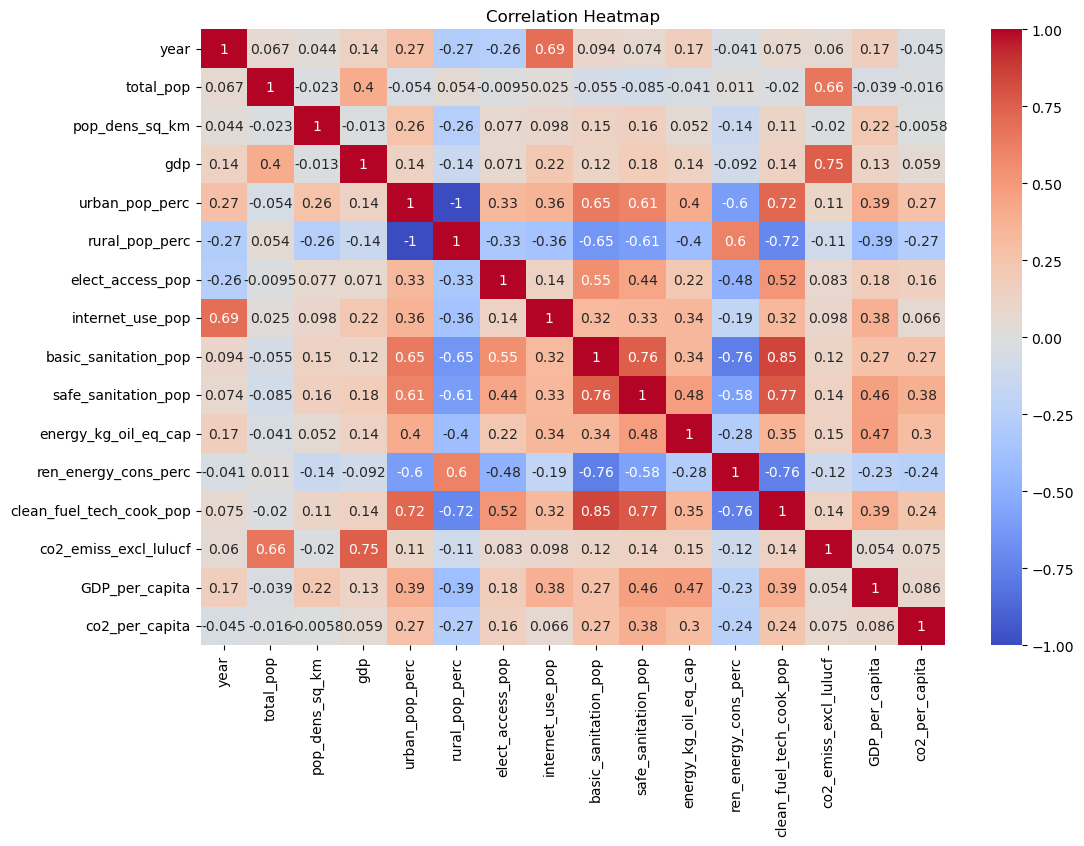

In [32]:
# Creating a correlation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This correlation matrix provides some interesting insights into the relationhsips between variables. For instance, it seems like GDP has a fairly significant relationship with carbon emissions. Overall this gives a great look at how different factors associated with urbanization interact with CO₂ emissions.

#### Pairplots/Scatter Plots

Next, to further explore some of these relationships, I am going to create a series of pair plots and scatterplots.

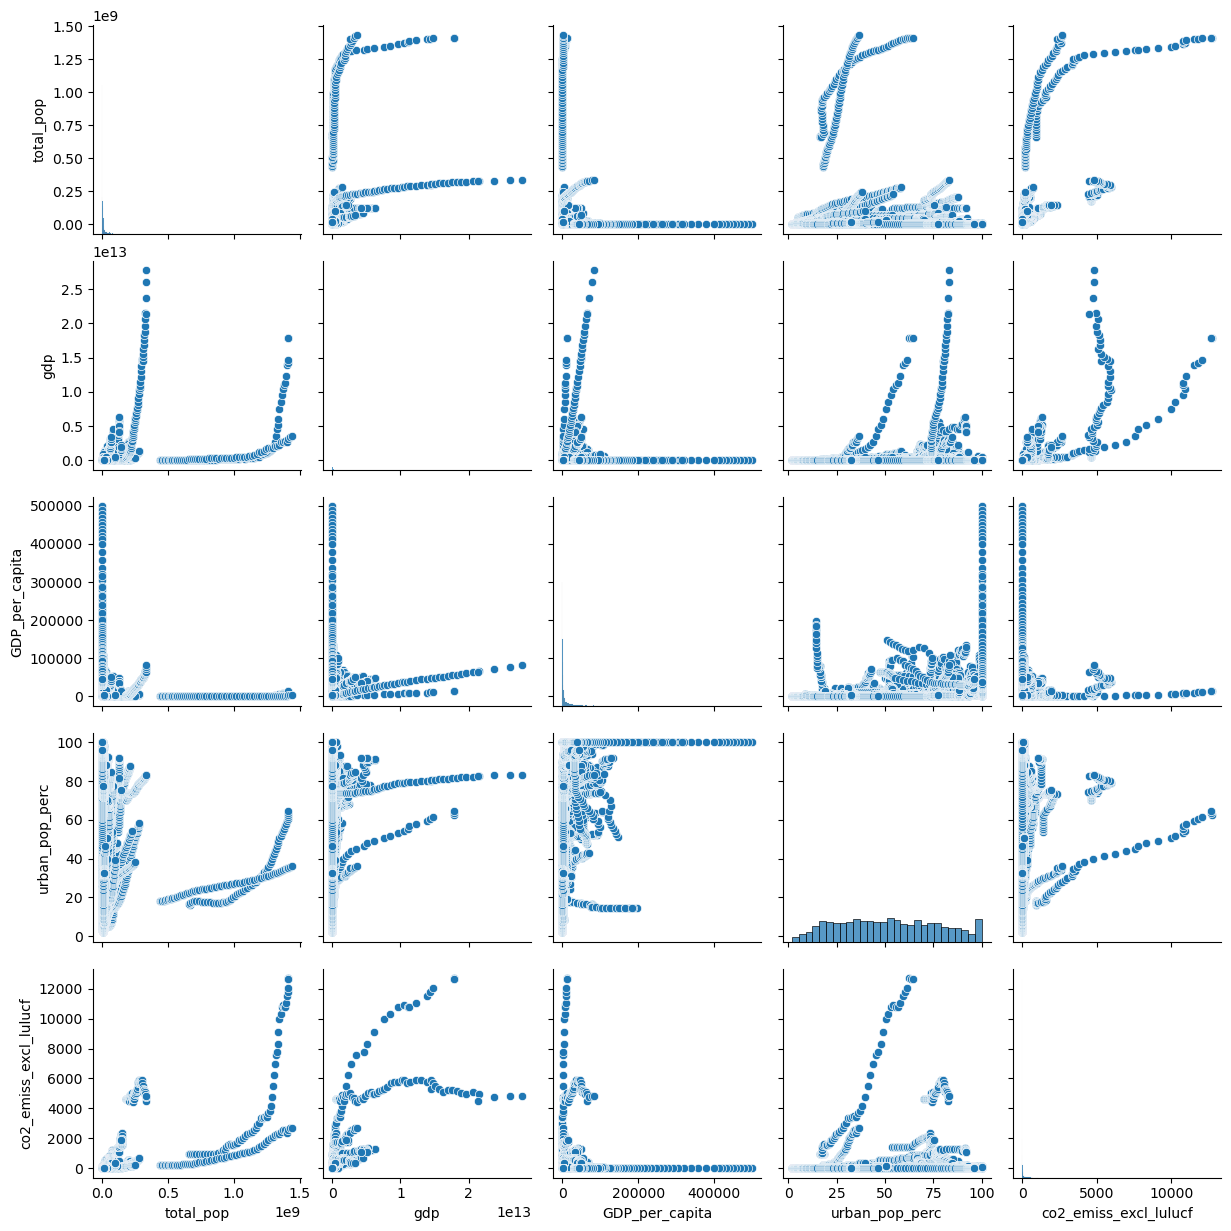

In [33]:
# Creating and plotting a seties of pair plots to visually inspect relationships
sns.pairplot(df_imputed, vars=['total_pop', 'gdp', 'GDP_per_capita', 'urban_pop_perc', 'co2_emiss_excl_lulucf'])
plt.show()

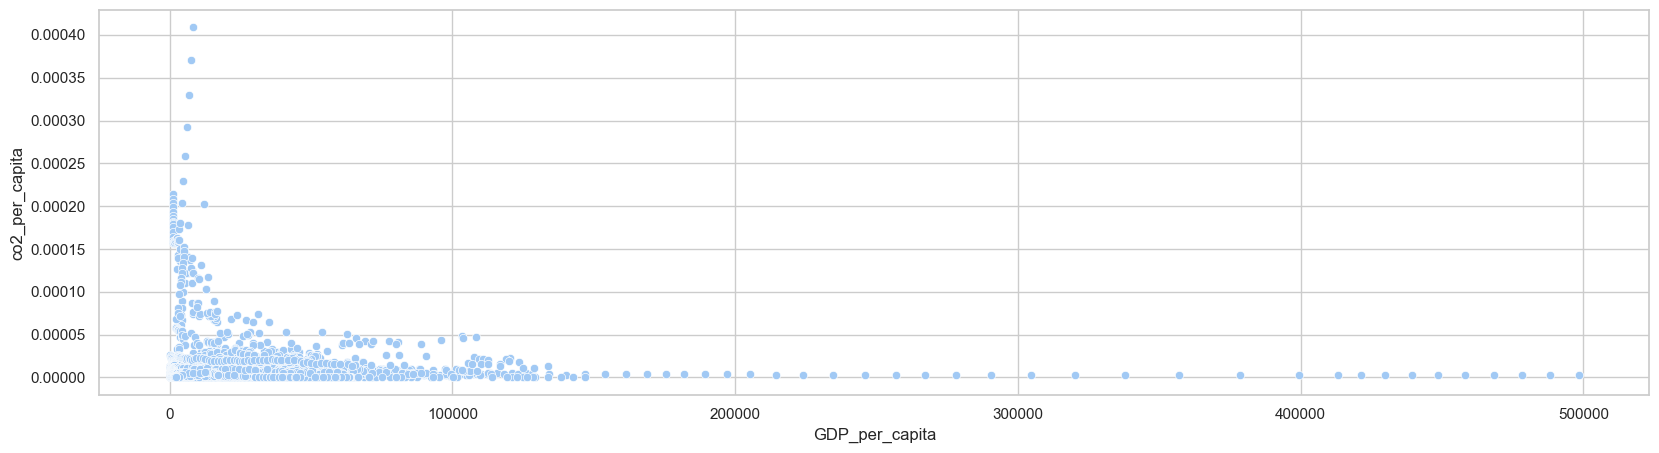

In [38]:
# Plotting GDP per capita vs CO2 emissions per capita
sns.scatterplot(data=df_imputed, x='GDP_per_capita', y='co2_per_capita')
plt.show()

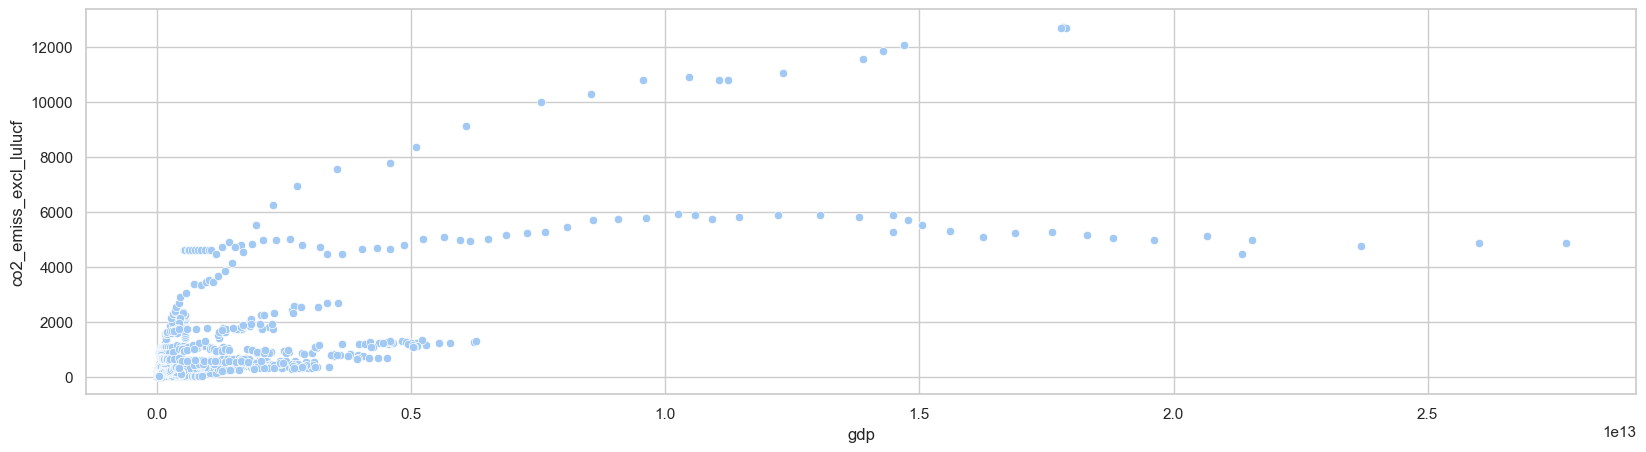

In [39]:
# PLotting GDP vs CO2 emissions
sns.scatterplot(data=df_imputed, x='gdp', y='co2_emiss_excl_lulucf')
plt.show()

Interestingly, it appears that an increase in GDP may be related to an increase in CO2 emissions, but perhaps this relationship may not be the same in GDP and CO2 emissions per capita.

#### Time Series Plots

Last, I am going to make a series of time series plots to understand the temporal trends of these variables.The first series will be using the imputed values, whereas the second one was used to determine if temporal interpolation could be used for additional variables. Compairing these side by side will also give us a good idea at how interpolation and imputation impacted some of these relationships, which remained overall fairly consistent.

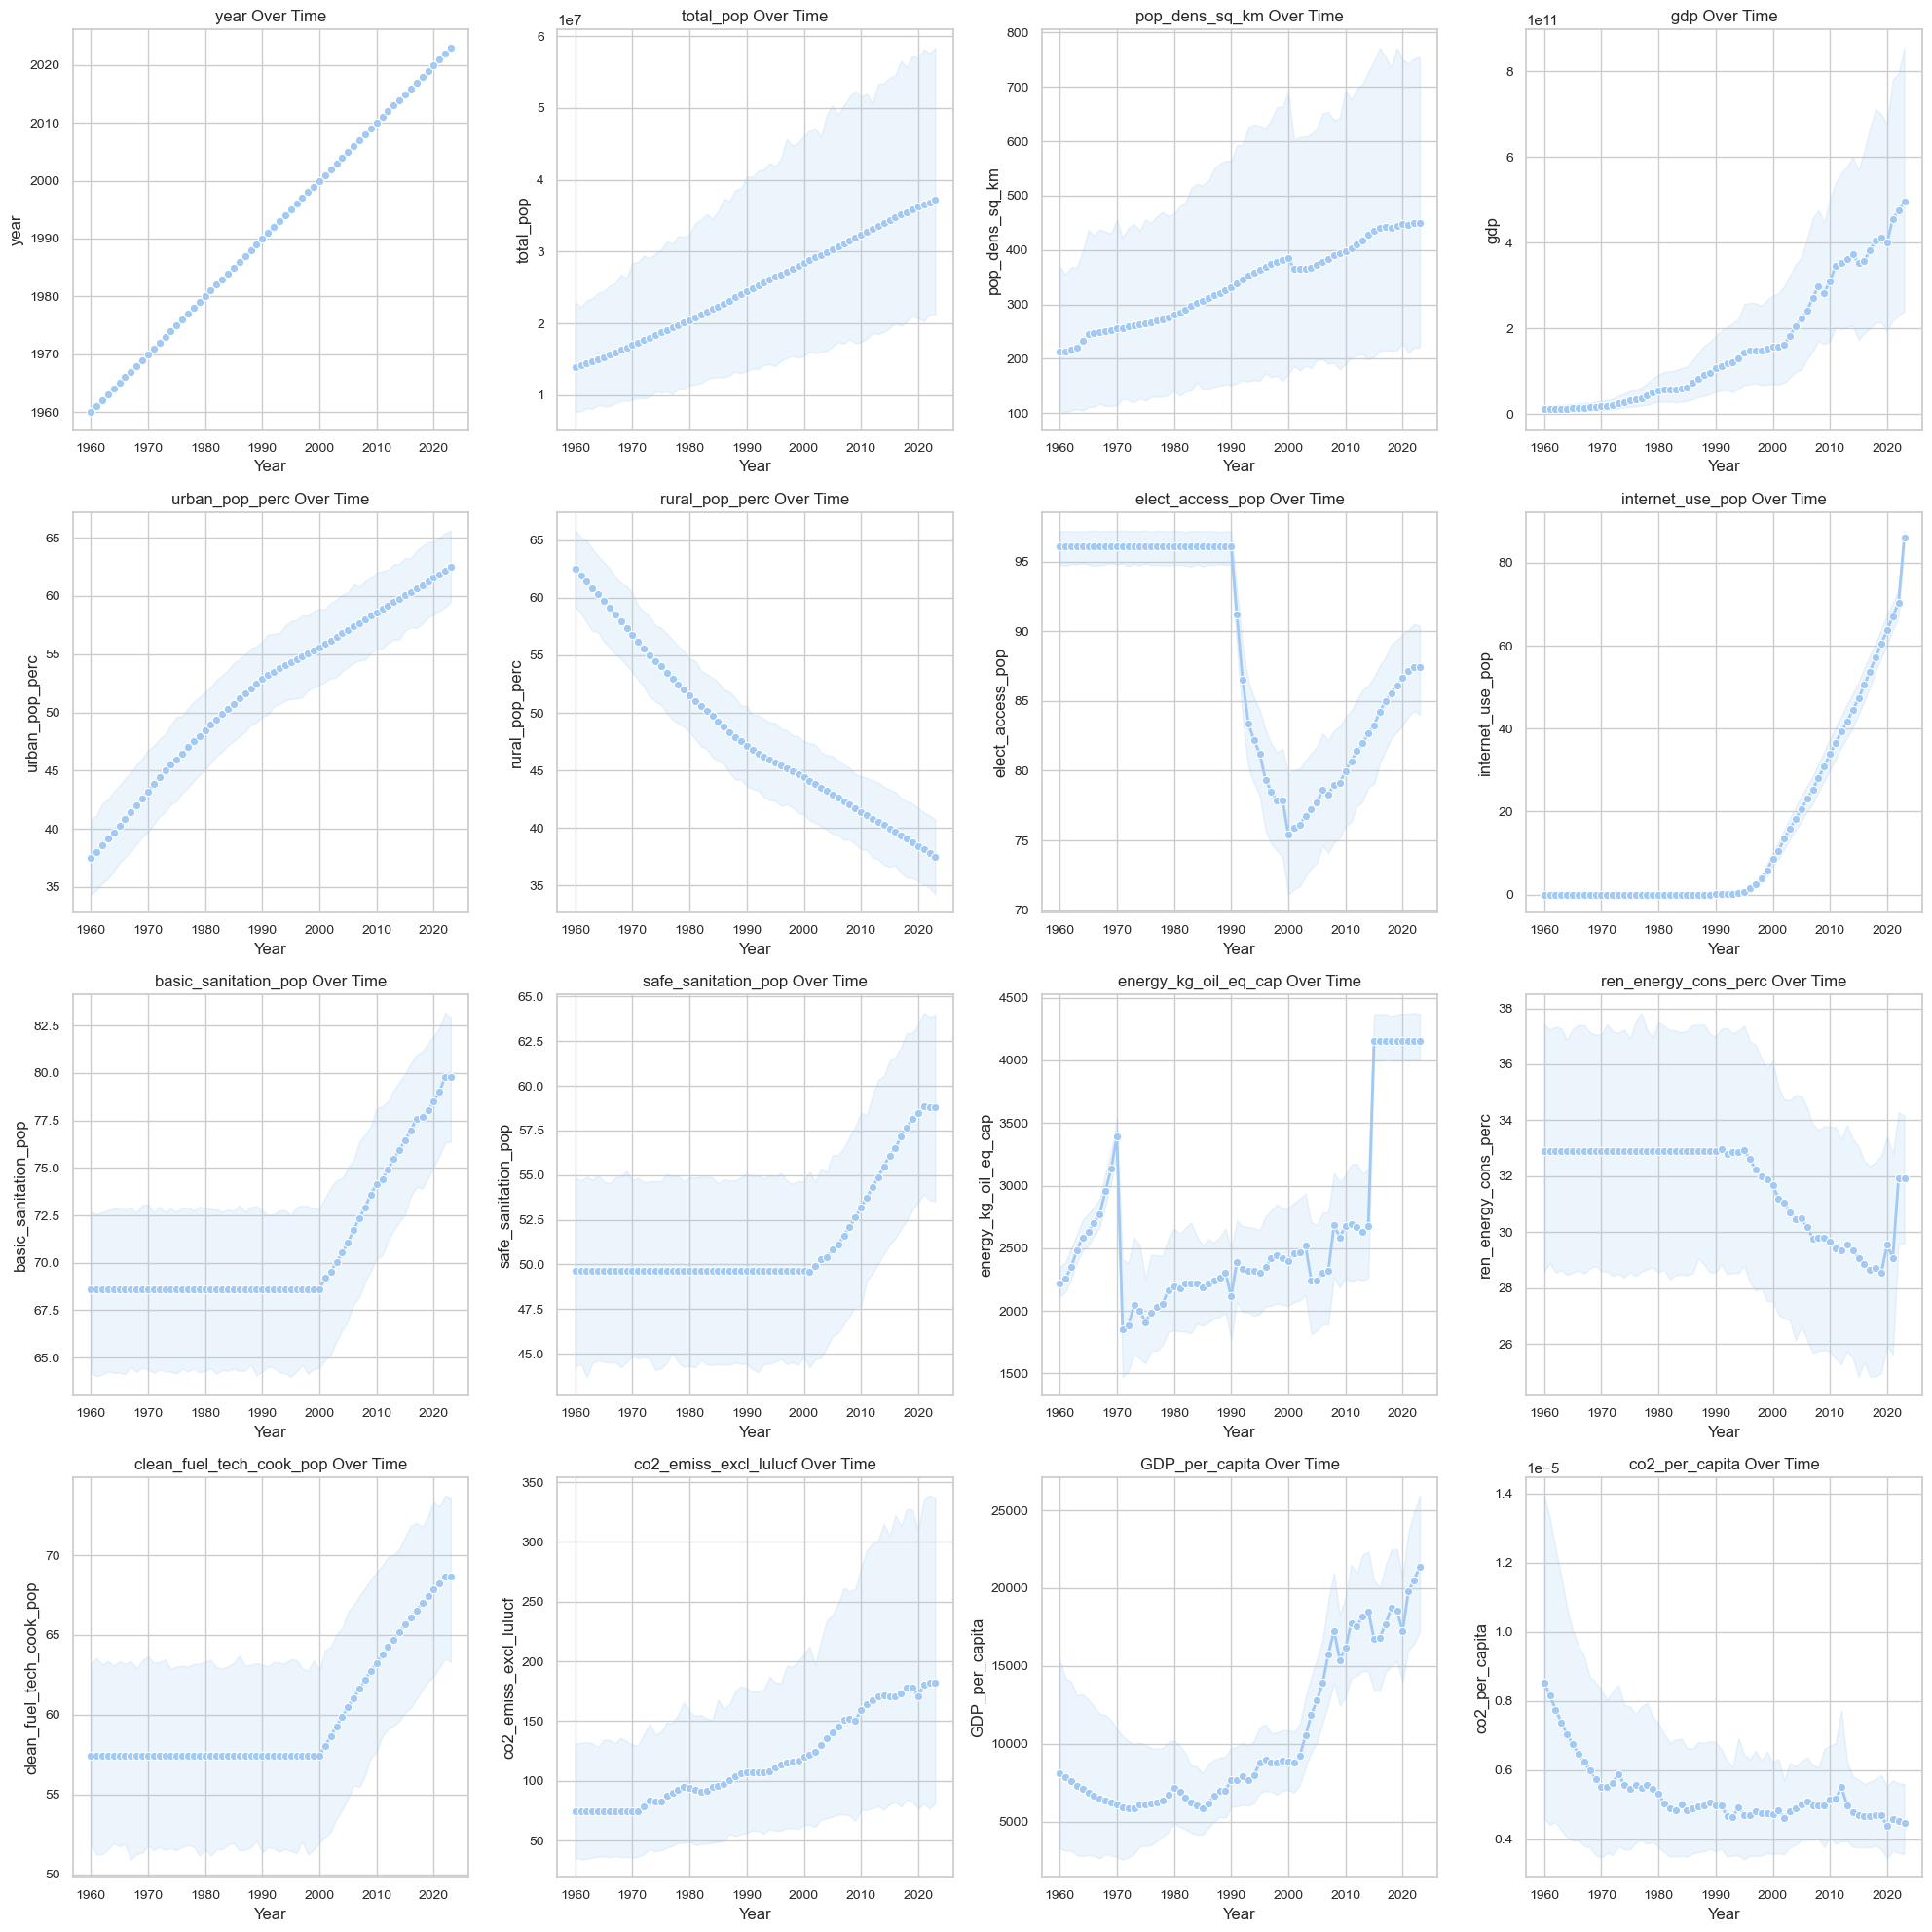

In [34]:
# Setting seaborn style and figure size
sns.set(style="whitegrid", palette="pastel", rc={"figure.figsize": (20, 5)})

# Calculating the number of rows needed for the plot grid (4 per row)
rows = (len(numeric_cols) + 3) // 4

# Creating subplots
fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plotting each numerical column
for idx, column in enumerate(numeric_cols):
    sns.lineplot(data=df_imputed, x='year', y=column, lw=2, ax=axes[idx], marker='o')
    axes[idx].set(title=f'{column} Over Time', xlabel='Year', ylabel=column)
    axes[idx].tick_params(axis='both', labelsize=10)
    axes[idx].grid(True)

# Hiding unused axes if there are any
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

In [35]:
# Setting numeric and non-numeric values with original dataframe
numeric_cols_filt = df_filtered.select_dtypes(include=[np.number]).columns
non_numeric_cols_filt = df_filtered.select_dtypes(exclude=[np.number]).columns

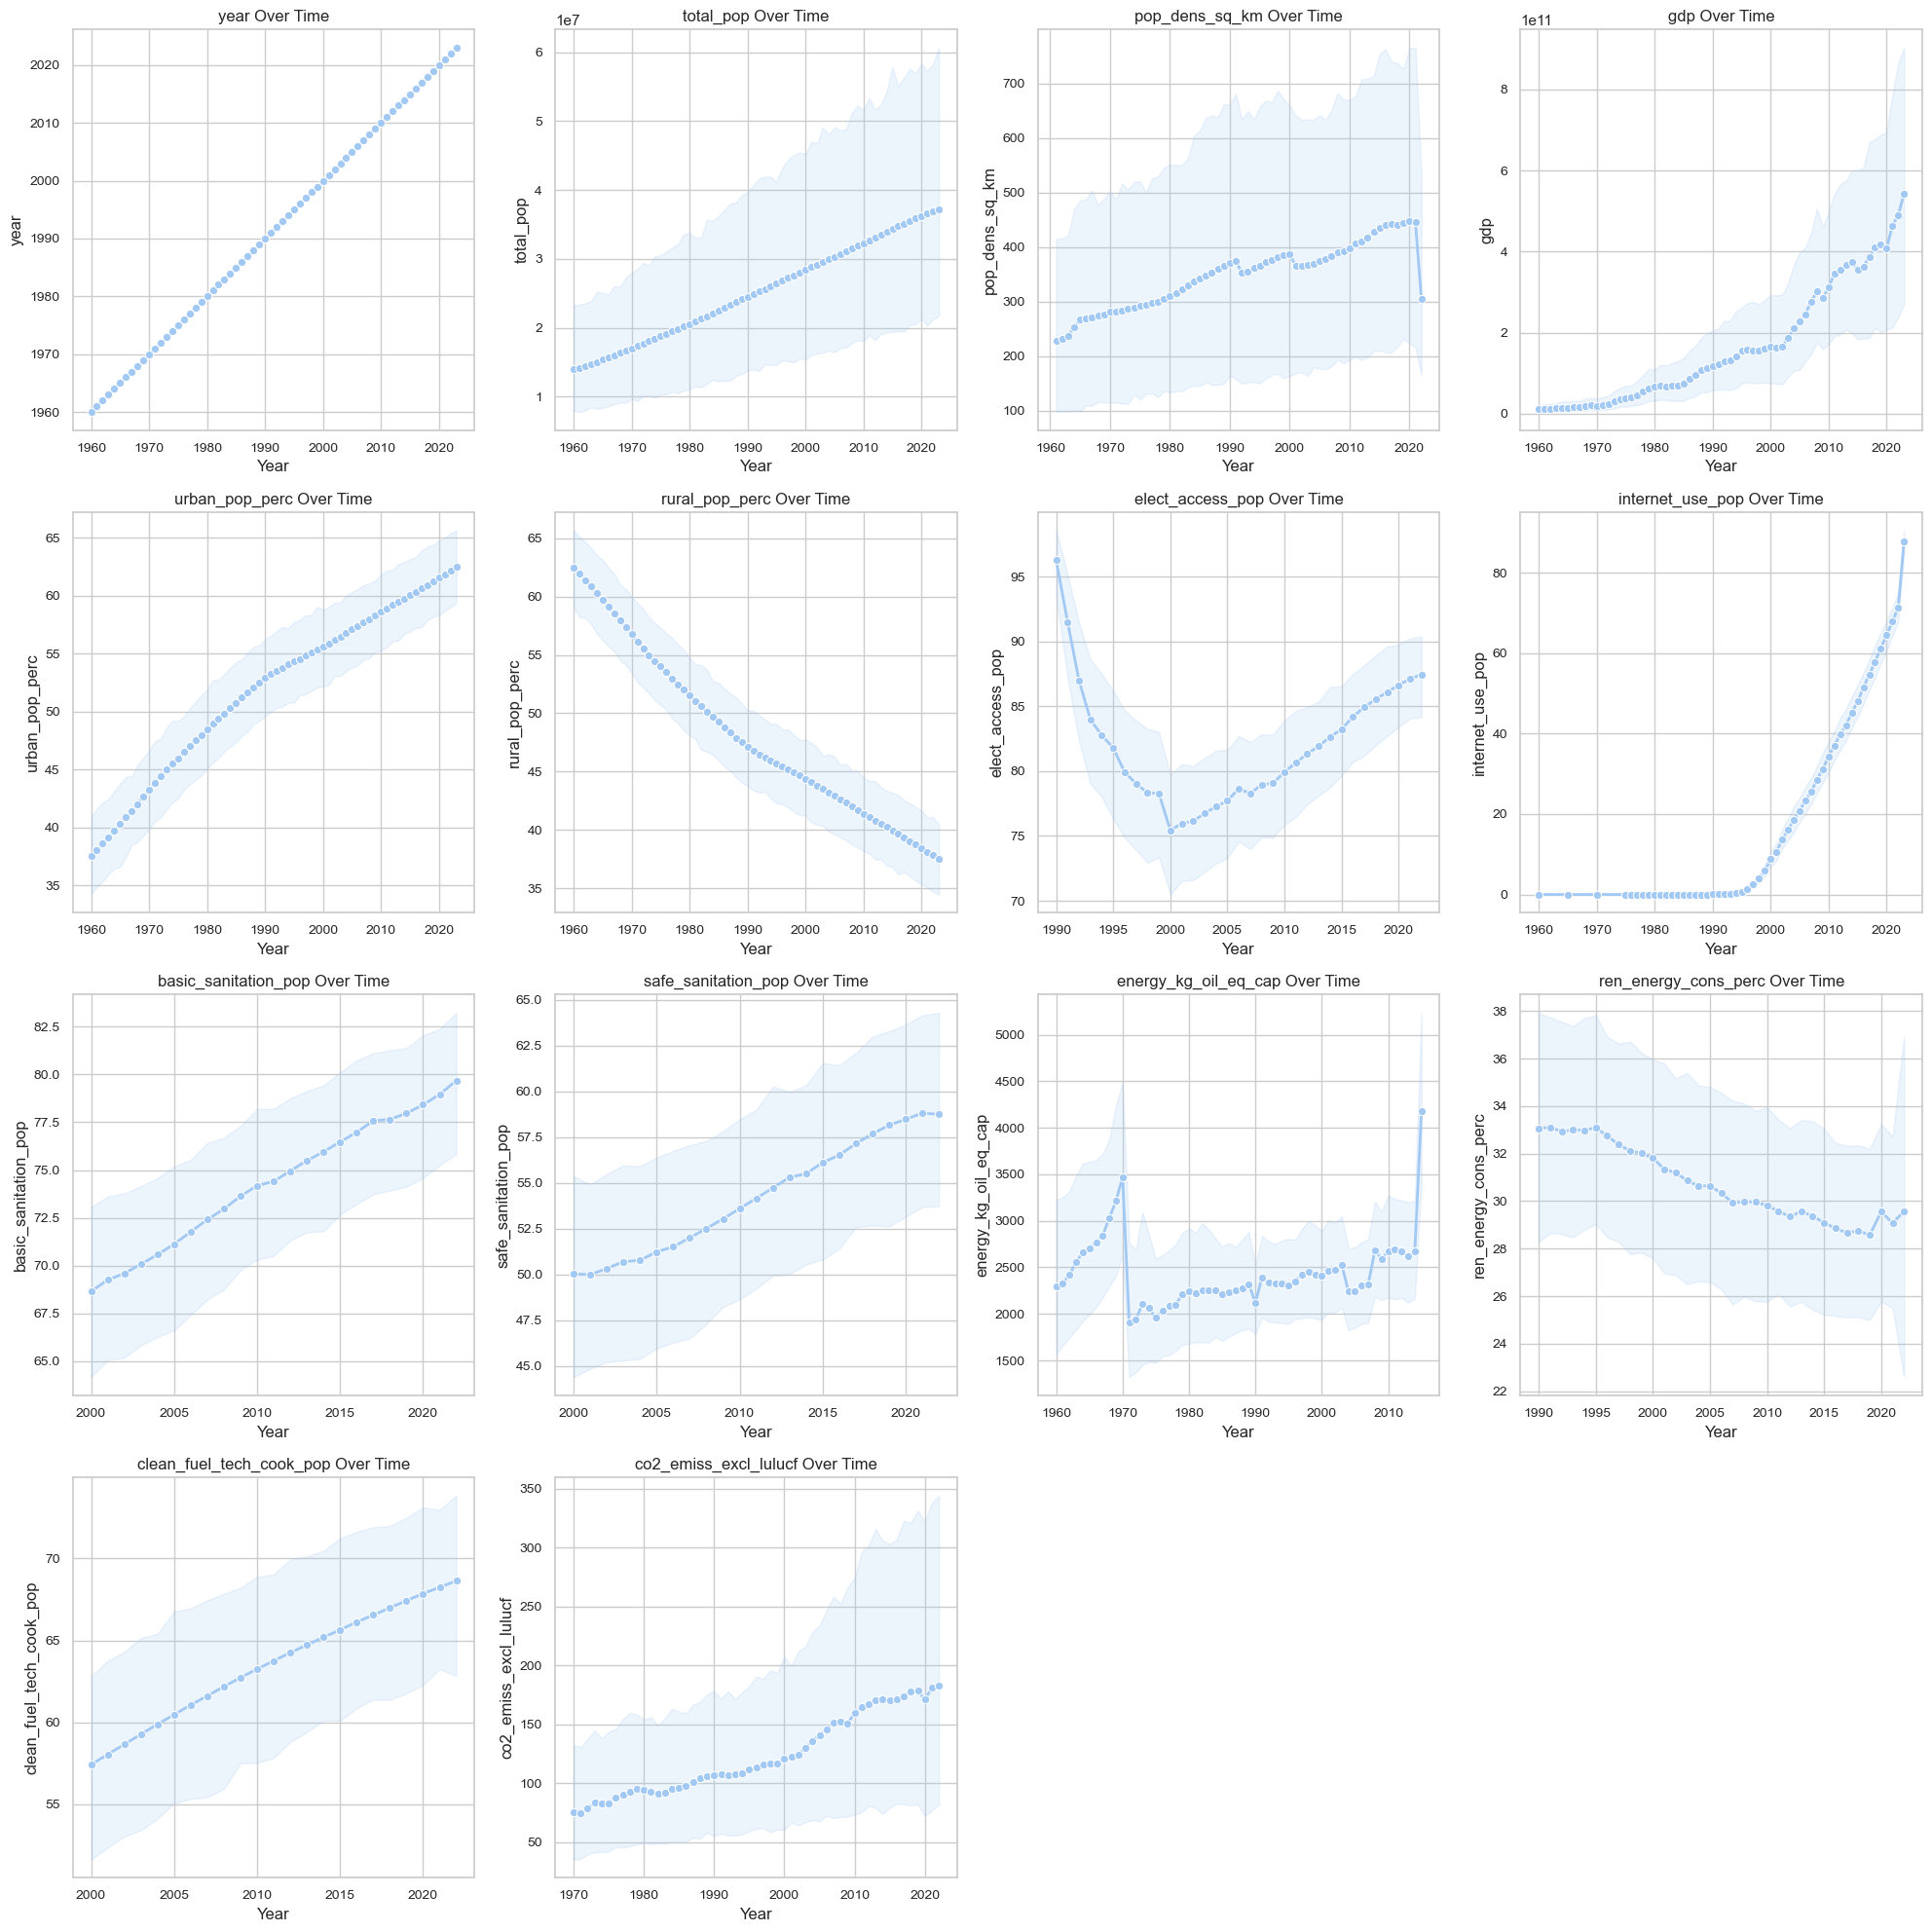

In [36]:
# Setting seaborn style and figure size
sns.set(style="whitegrid", palette="pastel", rc={"figure.figsize": (20, 5)})

# Calculating the number of rows needed for the plot grid (4 per row)
rows = (len(numeric_cols_filt) + 3) // 4

# Creating subplots
fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot each numerical column
for idx, column in enumerate(numeric_cols_filt):
    sns.lineplot(data=df_filtered, x='year', y=column, lw=2, ax=axes[idx], marker='o')
    axes[idx].set(title=f'{column} Over Time', xlabel='Year', ylabel=column)
    axes[idx].tick_params(axis='both', labelsize=10)
    axes[idx].grid(True)

# Hide unused axes if any
for idx in range(len(numeric_cols_filt), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

Last, while literature has shown that urban popoulation percentages are increasing while rural population percentages are decreasing, Iw anted to see if this data supports that claim. Whithout a doubt you can certainly see these trends below.

In [41]:
# Converting year to datetime
df['year'] = pd.to_datetime(df_filtered['year'], format='%Y')

In [44]:
# Calculating average urban and rural pop percentages by year
avg_trends = df_filtered.groupby('year')[['urban_pop_perc', 'rural_pop_perc']].mean().reset_index()

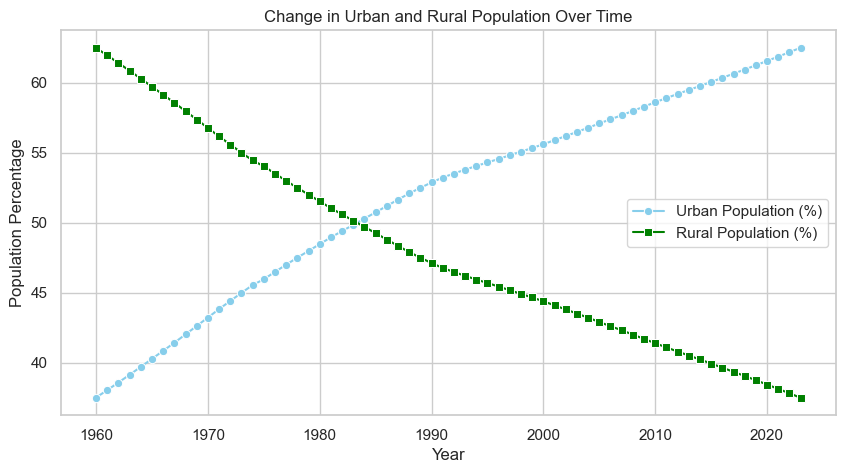

In [48]:
# Plotting urban and rural population percentages over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='urban_pop_perc', data=avg_trends, color='skyblue', label='Urban Population (%)', marker='o')
sns.lineplot(x='year', y='rural_pop_perc', data=avg_trends, color='green', label='Rural Population (%)', marker='s')

plt.xlabel("Year")
plt.ylabel("Population Percentage")
plt.title("Change in Urban and Rural Population Over Time")
plt.legend()
plt.grid(True)
plt.show()

### Modeling

Now that we have a clean dataset and an understanding of some of the relationhsips of interest, it is time to move into modeling. First up, two linear regression models will be used to identify the key drivers of CO2 emissions that are associated with urbanization. The dependent variables will be total CO2 emissions and per capita CO2 emissions, and independent variables included urbanization metrics such as population density, energy consumption, and renewable energy adoption. We'll standardize the data using a StandardScaler to normalize features before modeling. As stated above, any rows remaining with missing values (after extensive inputation methods) will be dropped from analysis. 

#### Linear Regression - Total CO2

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [40]:
# Loading the dataset and select features
features = [
    'gdp', 'GDP_per_capita', 'total_pop', 'urban_pop_perc', 'elect_access_pop', 
    'ren_energy_cons_perc', 'energy_kg_oil_eq_cap', 
    'internet_use_pop', 'basic_sanitation_pop'
]
target = 'co2_emiss_excl_lulucf'

In [41]:
# Dropping rows with missing target
df_model = df_imputed.dropna(subset=[target])

# Handling missing feature values (e.g., fillna or drop rows)
df_model = df_model[features + [target]].dropna()

df_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)

In [42]:
# Checking the shape of the df to ensure there is still enough data
df_model.shape

(10624, 10)

In [44]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df_model[target], test_size=0.2, random_state=42)

In [45]:
# Initializing the model and fitting it to the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Using the model to predict the test set and evaluating
y_pred = model.predict(X_test)
print(f"R^2: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

R^2: 0.7550669634255492
RMSE: 284.12879295607263
MAE: 108.5792761093696


In [47]:
# Calculating the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                Feature   Coefficient
0                   gdp  3.727568e-10
1        GDP_per_capita -5.789167e-03
2             total_pop  2.316057e-06
3        urban_pop_perc  9.848985e-01
4      elect_access_pop  7.206093e-02
5  ren_energy_cons_perc -6.731125e-01
6  energy_kg_oil_eq_cap  3.338773e-02
7      internet_use_pop -1.396775e+00
8  basic_sanitation_pop  1.028197e+00


This model achieved an R2 value of 0.755, indicating that approximately 75.5% of the variance in total CO₂ emissions could be explained by the selected predictors. The root mean square error (RMSE) was 284.13, and the mean absolute error (MAE) was 108.58, highlighting the model's predictive accuracy and average deviation from observed values.

The regression coefficients for each variable were calculated to provide deeper insight into their individual relationships with CO₂ emissions. Urban population percentage (β=0.985) showed a positive relationship with CO₂ emissions, meaning that for every 1 percentage point increase in urban population, CO₂ emissions are predicted to increase by 0.985 metric tons.  Similarly, basic sanitation access (β=1.028) and electricity access (β=0.072) were positively associated with emissions, likely reflecting infrastructure expansion and energy consumption in urban areas. While all of these increases are marginally small on an individual scale, they can aggregate to significant contributions to CO₂ emissions when considering the large-scale changes in urbanization and infrastructure development across entire countries or regions. Conversely, renewable energy consumption percentage (β=-0.673) was negatively associated with CO₂ emissions, highlighting its potential role in mitigating environmental impacts. Other variables, such as GDP per capita (β=-0.0058), showed significantly weaker relationships, indicating minimal direct contributions to emissions after accounting for other variables. 

#### Linear Regression - CO2 Per Capita

Next up, we'll perform a similar linear regression for CO2 per capita.

In [56]:
# Loading the dataset and select features
features = [
    'gdp', 'GDP_per_capita', 'total_pop', 'urban_pop_perc', 'elect_access_pop', 
    'ren_energy_cons_perc', 'energy_kg_oil_eq_cap', 
    'internet_use_pop', 'basic_sanitation_pop'
]
target = 'co2_per_capita'

In [57]:
# Dropping rows with missing target
df_model = df_imputed.dropna(subset=[target])

# Handling missing feature values (e.g., fillna or drop rows)
df_model = df_model[features + [target]].dropna()

In [59]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df_model[target], test_size=0.2, random_state=42)

In [60]:
# Initializing the model and fitting it to the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Using the model to predict the test set and evaluating
y_pred = model.predict(X_test)
print(f"R^2: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

R^2: 0.1425174634620856
RMSE: 1.5386221992669474e-05
MAE: 4.475510477718747e-06


In [62]:
# Calculating the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                Feature   Coefficient
0                   gdp -1.083621e-19
1        GDP_per_capita  4.841003e-11
2             total_pop  3.735863e-16
3        urban_pop_perc  1.163598e-07
4      elect_access_pop  8.634708e-09
5  ren_energy_cons_perc -4.343159e-08
6  energy_kg_oil_eq_cap  1.653180e-09
7      internet_use_pop -8.898240e-08
8  basic_sanitation_pop  2.414624e-08


This linear regression model for CO₂ emissions per capita yielded an R² value of 0.1425, indicating that the independent variables explain approximately 14.25% of the variation in CO₂ emissions per capita. The root mean square error (RMSE) was 1.54 × 10⁻⁵, and the mean absolute error (MAE) was 4.48 × 10⁻⁶, reflecting the small magnitude of predicted errors due to the scale of the dependent variable. Urban population percentage (β=1.16 × 10⁻⁷), basic sanitation access (β=2.41 × 10⁻⁸), and electricity access (β=8.63 × 10⁻⁹) were positively associated with per capita emissions, though the effects were minimal. Renewable energy consumption percentage (β=-4.34 × 10⁻⁸) showed a slight negative relationship, suggesting its potential to reduce emissions. The low R² value indicates that additional factors influence per capita CO₂ emissions beyond those included in this model.

#### K-Means Clustering

For the second model, K-means clustering will be employed to categorize countries into groups based on shared urbanization and CO₂ emission characteristics. This unsupervised learning approach allows for the identification of distinct country groupings that exhibit similar patterns in urbanization metrics, energy consumption, and emissions. By clustering countries, we can explore underlying structural similarities and differences, which may provide insights into policy strategies and developmental trends. The number of clusters was determined using the elbow method to balance model complexity and interpretability.

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [79]:
# Defining features to be used for clustering
clustering_features = [
    'gdp', 'total_pop', 'urban_pop_perc', 'elect_access_pop', 
    'ren_energy_cons_perc', 'energy_kg_oil_eq_cap', 
    'internet_use_pop', 'basic_sanitation_pop'
]

In [80]:
# Handling missing feature values (e.g., fillna or drop rows)
df_model = df_imputed[clustering_features].dropna()

# Checking shape
df_model.shape

(10880, 8)

In [81]:
# Creating the feature set
X_clustering = df_model[clustering_features]

In [82]:
# Applying standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

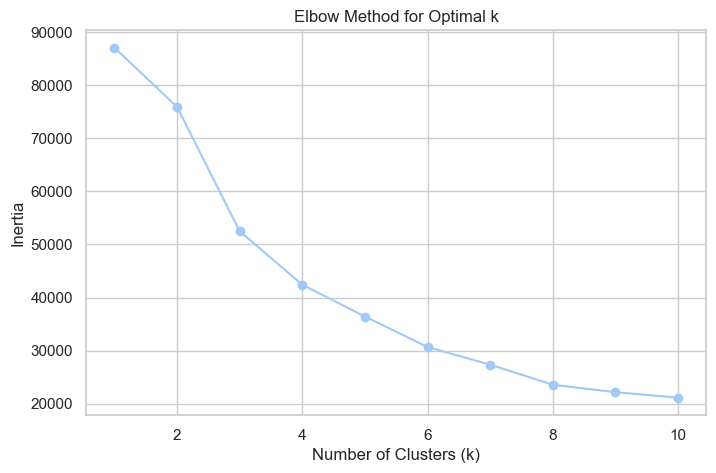

In [83]:
# Initializing an empty list to store inertia values  
inertia = []
# Defining a range of cluster values to test (from 1 to 10)
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fitting the model to the scaled data
    kmeans.fit(X_scaled)
    # Appending the inertia (sum of squared distances from points to their cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plotting inertia to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

There really isn't a great elbow to choose from, but it seems like around 4 is when the inertia plot starts to turn. To prevent overclustering, I will proceed with 4 clusters.

In [84]:
# Building the k-means with 4 clusters and fitting the model
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_model['cluster'] = kmeans.fit_predict(X_scaled)

In [85]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(X_scaled, df_model['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3407001248839375


The Silhouette Score of 0.34 indicates moderate separation between clusters, suggesting meaningful but somewhat overlapping group distinctions. To get a better understaniding and profile of these clusters, we'll do some additional evaluation including visualizing the clusters and looking at the sizes and summaries of them.

In [86]:
from sklearn.decomposition import PCA

# Applying PCA to reduce the dataset to 2 principal components for visualization or dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

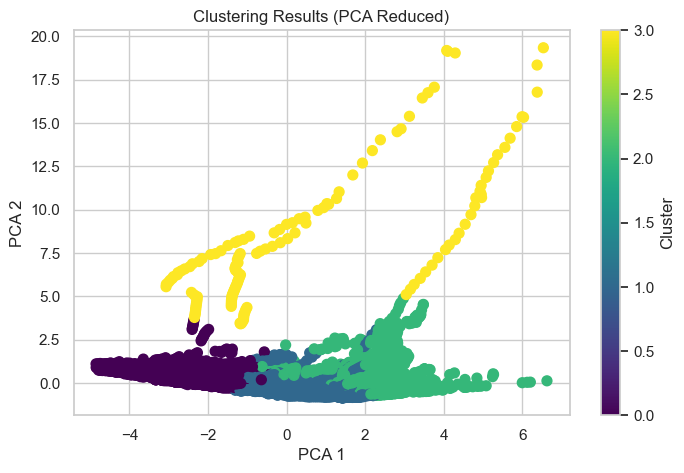

In [87]:
# Creating a scatterplot visualizing the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_model['cluster'], cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering Results (PCA Reduced)')
plt.colorbar(label='Cluster')
plt.show()

In [90]:
# Calculating cluster summary
cluster_summary = df_model.groupby('cluster').agg(['mean', 'std'])

print("Cluster Summary (Mean and Standard Deviation):")
print(cluster_summary)

Cluster Summary (Mean and Standard Deviation):
                  gdp                   total_pop                \
                 mean           std          mean           std   
cluster                                                           
0        1.497714e+10  4.180833e+10  2.329394e+07  5.521810e+07   
1        7.307042e+10  2.357798e+11  1.609923e+07  2.990502e+07   
2        4.505747e+11  9.060807e+11  2.276528e+07  4.271041e+07   
3        5.155535e+12  6.914921e+12  9.176831e+08  3.912686e+08   

        urban_pop_perc            elect_access_pop             \
                  mean        std             mean        std   
cluster                                                         
0            29.535075  15.055949        71.409063  29.605603   
1            55.347239  19.306948        95.666777   6.818182   
2            73.486308  17.413676        98.355797   6.034912   
3            41.997529  23.254292        91.612752  12.792978   

        ren_energy_cons_per

In [96]:
# Analyzing cluster centroids
X_subset = X.iloc[:, :8]
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_subset.columns)

In [97]:
print("\nCluster Centroids:")
print(centroids)


Cluster Centroids:
        gdp  GDP_per_capita  total_pop  urban_pop_perc  elect_access_pop  \
0 -0.170183       -0.065037  -0.944932       -0.919089          1.289757   
1 -0.115968       -0.126144   0.150016        0.305222         -0.490076   
2  0.236330       -0.069527   0.919472        0.440940         -0.460939   
3  4.627141        7.531213  -0.416277        0.100612         -0.062249   

   ren_energy_cons_perc  energy_kg_oil_eq_cap  internet_use_pop  
0             -0.446274             -0.422357         -1.383866  
1             -0.184356             -0.415308          0.451017  
2              1.090578              1.653998          0.721497  
3              0.066678              0.273127         -0.385311  



Cluster Sizes:
cluster
1    5666
0    2927
2    2147
3     140
Name: count, dtype: int64


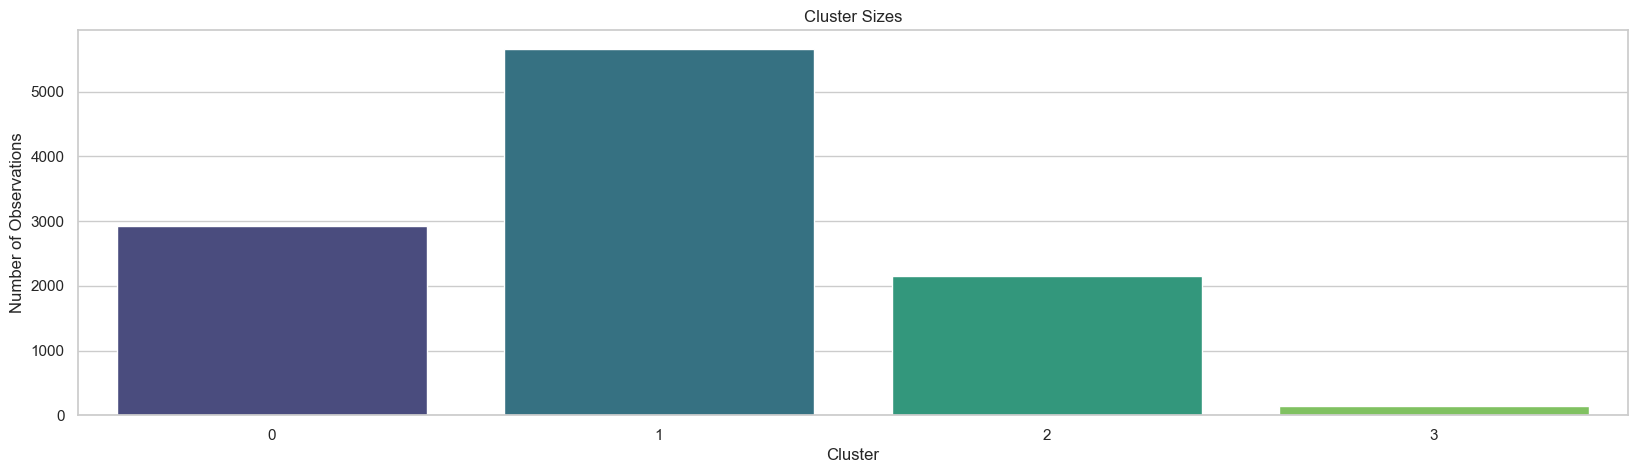

In [99]:
# Calculating and visualizing cluster sizes
cluster_sizes = df_model['cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)

sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.show()

Despite the moderate Silhouette Score, there were some notable distinctions among the different clusters. Cluster 0, which represents countries with lower urbanization rates (mean urban population percentage: 29.5%) and moderate energy consumption (mean energy use: 1560 kg oil equivalent per capita), is characterized by lower access to electricity (mean: 71.4%) and basic sanitation (mean: 33.1%). Most likely, this group is composed of developing nations or those with a slower rate of historic urban growth. In cluster 1, we see countries with higher urbanization (mean urban population percentage: 55.3%) and a moderate percentage of renewable energy consumption (mean: 16.5%), but with high access to electricity (mean: 95.7%) and improved sanitation (mean: 86%). These countries appear to be in early-to-mid stages of urban development, balancing growth with increasing industrialization.

Cluster 2 represents highly urbanized countries with advanced infrastructure, evidenced by a mean urban population percentage of 73.5%, almost universal electricity access (mean: 98.4%), and moderate renewable energy consumption (mean: 17.3%). These countries also show high energy consumption per capita (mean: 5242.5 kg oil equivalent). This cluster likely includes developed nations with sophisticated energy and infrastructure systems, but also significant environmental impacts from energy use. Cluster 3, with a mean urban population percentage of 42%, reflects moderate urbanization and varied energy use patterns. Countries in this cluster show moderate comparative access to electricity (mean: 91.6%) and relatively higher renewable energy consumption (mean: 28.8%), with energy consumption per capita falling somewhere in the middle (mean: 2789.4 kg oil equivalent). This group could represent emerging economies with a diverse range of urbanization and energy consumption patterns, making them difficult to categorize.

### Conclusions

The results from the linear regression models and K-means clustering provide valuable insights into the complex relationship between urbanization and CO₂ emissions, although some limitations remain in the analysis. The regression models reveal that urbanization, basic sanitation access, and electricity access are positively associated with CO₂ emissions, indicating that infrastructure development in urban areas contributes to increased emissions. However, the potential mitigating effect of renewable energy consumption is evident, especially in the case of total emissions. The model for CO₂ emissions per capita, however, has a low R² value, suggesting that other unaccounted factors may play a significant role in emissions at an individual level. This highlights the complexity of the relationship between urbanization and per capita emissions, suggesting that while cities have the potential to reduce emissions through improved infrastructure and sustainable practices, further research is needed to capture all the contributing factors and fully understand this dynamic.

The K-means clustering further emphasizes the complex relationship between urbanization and emissions, with distinct groups formed based on energy consumption and infrastructure development. However, the moderate Silhouette Score indicates that the clusters do overlap to some extent, pointing to the need for more refined classification. Overall, while the findings provide meaningful insights into the drivers of CO₂ emissions, the relatively low predictive power for per capita emissions and the moderate clustering results suggest that further exploration of additional variables or alternative modeling techniques could lead to more precise conclusions.

Based on these results, two major conclusions can be made: First, urbanization and infrastructure development do play a role in driving CO₂ emissions, with higher urban population percentages and improved access to electricity and sanitation being positively associated with increased emissions. Second, while renewable energy consumption shows a negative relationship with CO₂ emissions, the impact is more pronounced in highly urbanized countries, suggesting that a transition to cleaner energy sources could help mitigate emissions. Being that significant increases in urbanization is projected in the coming years, these models can be used as a guide for policymakers and developers to predict the environmental impact of urban growth and to inform strategies that best prioritize sustainable infrastructure development. Additionally, by clustering countries with similar socioeconomic and urbanization patterns, targeted interventions can be developed that account for regional differences, allowing for more effective policy implementation and resource allocation to mitigate CO₂ emissions and promote sustainable urban growth.
